In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
from zipfile import ZipFile

In [3]:
!pip install -q kaggle

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download sartajbhuvaji/brain-tumor-classification-mri

 78% 68.0M/86.8M [00:00<00:00, 120MB/s]
100% 86.8M/86.8M [00:00<00:00, 139MB/s]


In [9]:
with ZipFile('/content/brain-tumor-classification-mri.zip', 'r') as zip:
    zip.extractall('/content/data/')

In [10]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [11]:
train_data = tf.keras.utils.image_dataset_from_directory('/content/data/Training',
                                                         shuffle = True,
                                                         image_size = IMG_SIZE,
                                                         batch_size = BATCH_SIZE)

Found 2870 files belonging to 4 classes.


In [12]:
test_data = tf.keras.utils.image_dataset_from_directory('/content/data/Testing',
                                                         shuffle = True,
                                                         image_size = IMG_SIZE,
                                                         batch_size = BATCH_SIZE)

Found 394 files belonging to 4 classes.


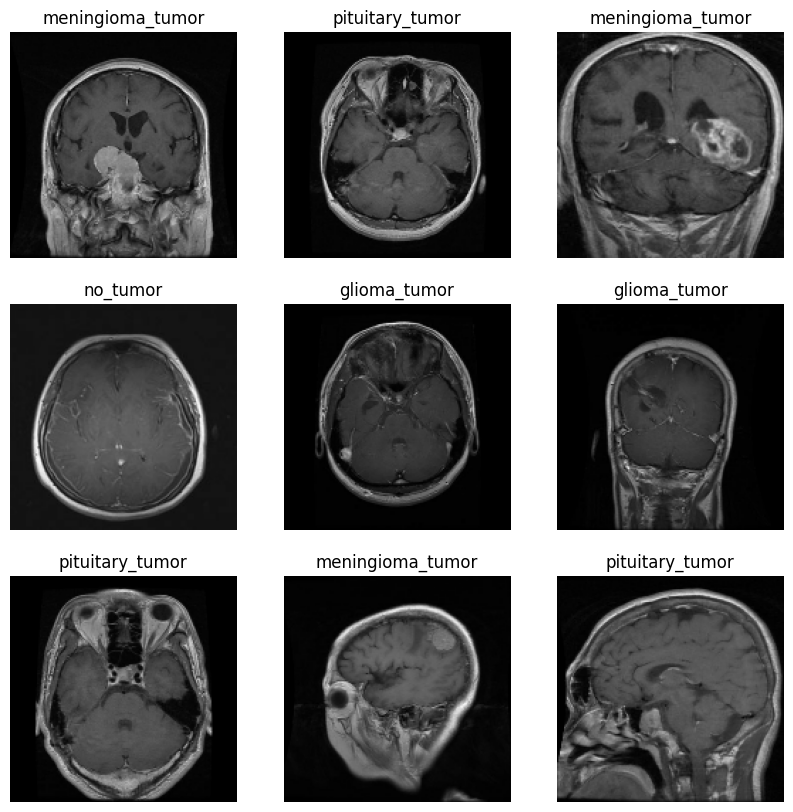

In [13]:
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")